# COMP 7570: Blockchain Data Analytics
Author: Nabila Chowdhury ( chowdh26@myumanitoba.ca)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import networkx as nx

%matplotlib inline

plt.style.use('ggplot')

In [3]:
import os

In [4]:
data_folder = '/Users/monowar/Documents/DataFromRipple'

### Reading the transactions file
The file contains the successful transactions in csv format.

In [5]:
successful_transaction_file = os.path.join(data_folder, 'Transactions_SUCCESS.csv')

In [6]:
success_df = pd.read_csv(successful_transaction_file)

In [7]:
success_df.head()

,id,transaction_hash,transaction_time,transaction_type,amount_value,amount_currency,transaction_result,delivered_amount,delivered_currency,account,destination
0,1,5ED9838DC9F2F5729C8CA29140410DDD439FCD8C6A706C...,2020-08-01T00:00:00+00:00,Payment,1.020000e+04,XRP,tesSUCCESS,1.020000e+04,XRP,rAPERVgXZavGgiGv6xBgtiZurirW2yAmY,rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA
1,3,6FEF318E57EFCA5BDBACB64CEB5C53C34C55CBA10A987E...,2020-08-01T00:00:01+00:00,Payment,3.737460e+07,XRP,tesSUCCESS,3.737460e+07,XRP,rpJFnqJG9rK8acGFYAM5DbRLqKWvbw4idV,rHnq6CPtkDgG25fBwf1EnsN1gDu9NoxP2K
2,4,AAA0ECC4EA67160F20B2400B6A85CCA36850B16C945626...,2020-08-01T00:00:01+00:00,Payment,1.353325e+10,XRP,tesSUCCESS,1.353325e+10,XRP,rw2ciyaNshpHe7bCHo4bRWq6pqqynnWKQg,r3YsZdkznVzYBv141qhwXHDWoPUXLdksNw
3,5,57D1595E8D984B1FAA51000DDB2DDD2407A4EF30FD91DC...,2020-08-01T00:00:01+00:00,Payment,8.800000e+01,XRP,tesSUCCESS,8.800000e+01,XRP,rNedHaD7vkxNqo4yHcScX9gdsQZ2DZ7g23,rHZqGqv35uZjt4yMh5BDX1yUHgdDm1EvHC
4,6,3FAEECFD4F20DDF18AAFEBA67B9B5C24F5B9B9DF60DB1D...,2020-08-01T00:00:01+00:00,Payment,8.800000e+01,XRP,tesSUCCESS,8.800000e+01,XRP,rNedHaD7vkxNqo4yHcScX9gdsQZ2DZ7g23,rEPSWoYRGsbECGMLfyc2MaBuY2rGqHxcwo


In [8]:
success_df.tail()

,id,transaction_hash,transaction_time,transaction_type,amount_value,amount_currency,transaction_result,delivered_amount,delivered_currency,account,destination
1244806,2025843,E6F031061553E526C613659040F0A73B18F42231CC8B02...,2020-08-14T23:59:41+00:00,Payment,6.720000e+06,XRP,tesSUCCESS,6.720000e+06,XRP,rP8VvqTDeMtC7Vmp85CVvqJ5BH1QF3yvj3,rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA
1244807,2025844,E7A3D2A46EA2CB0F93E1F29D7C0A21803BA8F79689EF1B...,2020-08-14T23:59:41+00:00,Payment,1.008281e+11,XRP,tesSUCCESS,1.008281e+11,XRP,rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh,rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy
1244808,2025847,291E6682D2AEA2AF881ACEC252452A1269CAC28DA60426...,2020-08-14T23:59:42+00:00,Payment,1.000000e+00,XRP,tesSUCCESS,1.000000e+00,XRP,r9ujfsgebDGPEoQP7WFYcVrhEKQZPKVGd7,rhtnpam76VS7jxNkXucUfwmfDQ2v2uQU65
1244809,2025852,DBFE58A268E3B88EC6CB966A35049E1ACB987366F38652...,2020-08-14T23:59:51+00:00,Payment,3.000000e+03,XRP,tesSUCCESS,3.000000e+03,XRP,rAPERVgXZavGgiGv6xBgtiZurirW2yAmY,rsRy14FvipgqudiGmptJBhr1RtpsgfzKMM
1244810,2025853,46D3C25305582CA1A59616E322F1AF642CD7FA877050A2...,2020-08-14T23:59:51+00:00,Payment,1.272260e+09,XRP,tesSUCCESS,1.272260e+09,XRP,r3YsZdkznVzYBv141qhwXHDWoPUXLdksNw,r3Wv8EqfX6BvXoVBuPwtG1AyLDdthsLQoc


### Creating a Networkx graph in python to analyze the network characteristics

In [9]:
tx_succ_graph = nx.DiGraph();

In [10]:
# Adding edges in the graph
for i in range(len(success_df)):
    tx_succ_graph.add_edge(success_df['account'][i], success_df['destination'][i])

In [11]:
# Getting the degree of the nodes
degree_tx_success = dict(tx_succ_graph.degree)

In [12]:
# Finding out the node with the maximum degree
max_degree_node = []
max_node_val = 0
for k in degree_tx_success:
    if degree_tx_success[k]>max_node_val:
        max_degree_node = k
        max_node_val = degree_tx_success[k]

In [13]:
max_degree_node

'rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy'

In [177]:
type(list(degree_tx_success.values()))

list

In [14]:
degree_array = np.array(sorted(list(degree_tx_success.values()), reverse = True))

<ipython-input-15-2434bee75fe1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(bins, rotation = 90)
<ipython-input-15-2434bee75fe1>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.axes().set_xticklabels(bins, rotation = 90)
<ipython-input-15-2434bee75fe1>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('Degree Of the nodes of the graph', font

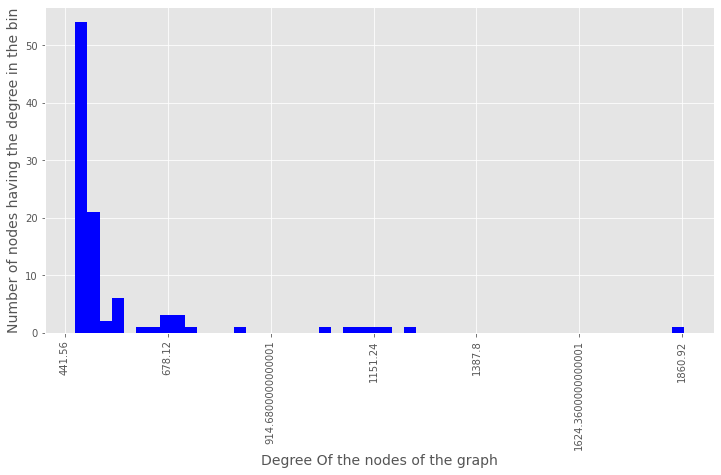

In [15]:
# Plotting the histogram. The code is taken from stackoverflow
plt.figure(figsize=(12,6))
counts , bins , patches = plt.hist(degree_array[:100], bins=50, color ='b')
plt.axes().set_xticklabels(bins, rotation = 90)
plt.axes().set_xlabel('Degree Of the nodes of the graph', fontsize = '14')
plt.axes().set_ylabel('Number of nodes having the degree in the bin', fontsize = '14')
plt.show()

### All the following blocks involve graph characteristics analysis
The codes are mostly directly taken from the official networkx site documentation

In [16]:
node_list = []
node_list.append(max_degree_node)


edge_list = []
success_df_max_degree = success_df[success_df['account'] == max_degree_node]
list_of_unique_nodes = success_df_max_degree['destination'].unique()
for node in list_of_unique_nodes:
    edge_list.append((max_degree_node, node))
    node_list.append(node)

In [17]:
sub_graph_of_the_highest_degree_node = tx_succ_graph.subgraph(nodes=node_list)
print(nx.info(sub_graph_of_the_highest_degree_node))

Name: 
Type: DiGraph
Number of nodes: 12025
Number of edges: 27110
Average in degree:   2.2545
Average out degree:   2.2545


In [18]:
print(nx.info(tx_succ_graph))

Name: 
Type: DiGraph
Number of nodes: 71032
Number of edges: 133935
Average in degree:   1.8856
Average out degree:   1.8856


In [192]:
clustering_coeff = nx.algorithms.average_clustering(tx_succ_graph)

In [193]:
clustering_coeff

0.11102557903723806

In [19]:
degree_centrality = nx.algorithms.centrality.degree_centrality(tx_succ_graph)

In [20]:
degree_centrality

{'rAPERVgXZavGgiGv6xBgtiZurirW2yAmY': 0.0019146569807548816,
 'rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA': 0.015092002083597303,
 'rpJFnqJG9rK8acGFYAM5DbRLqKWvbw4idV': 0.0005490560459517676,
 'rHnq6CPtkDgG25fBwf1EnsN1gDu9NoxP2K': 0.001267052413734848,
 'rw2ciyaNshpHe7bCHo4bRWq6pqqynnWKQg': 0.07247539806563331,
 'r3YsZdkznVzYBv141qhwXHDWoPUXLdksNw': 0.08914417648632288,
 'rNedHaD7vkxNqo4yHcScX9gdsQZ2DZ7g23': 0.0001126268812208754,
 'rHZqGqv35uZjt4yMh5BDX1yUHgdDm1EvHC': 8.447016091565654e-05,
 'rEPSWoYRGsbECGMLfyc2MaBuY2rGqHxcwo': 7.039180076304712e-05,
 'rMBzp8CgpE441cp5PVyA9rpVV7oT8hP3ys': 8.447016091565654e-05,
 'rhtnpam76VS7jxNkXucUfwmfDQ2v2uQU65': 8.447016091565654e-05,
 'rJtwcYPoNF3CufR8QVCkAZDASHQtyUDzdq': 7.039180076304712e-05,
 'rBtH5Kq9GxasrNbyMzEXCZDmAbPoCZ3CiY': 5.63134406104377e-05,
 'rsekGH9p9neiPxym2TMJhqaCzHFuokenTU': 0.004251664766088046,
 'rKV8HEL3vLc6q9waTiJcewdRdSFyx67QFb': 0.016007095493516914,
 'rnqZnvzoJjdg7n1P9pmumJ7FQ5wxNH3gYC': 0.0056735791415015975,
 'rh5NJ7kZDaxcKwhr

In [21]:
# From dictionary to the list for conversion to numpy array later
centrality = []
for n in degree_centrality:
    centrality.append(degree_centrality[n])

In [22]:
centrality_array = np.array(centrality)

In [23]:
centrality_array

array([1.91465698e-03, 1.50920021e-02, 5.49056046e-04, ...,
       1.40783602e-05, 1.40783602e-05, 1.40783602e-05])

<ipython-input-37-487b41b16f79>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(np.exp(bins)*np.exp(5), rotation = 90)
<ipython-input-37-487b41b16f79>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.axes().set_xticklabels(np.exp(bins)*np.exp(5), rotation = 90)
<ipython-input-37-487b41b16f79>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('Cen

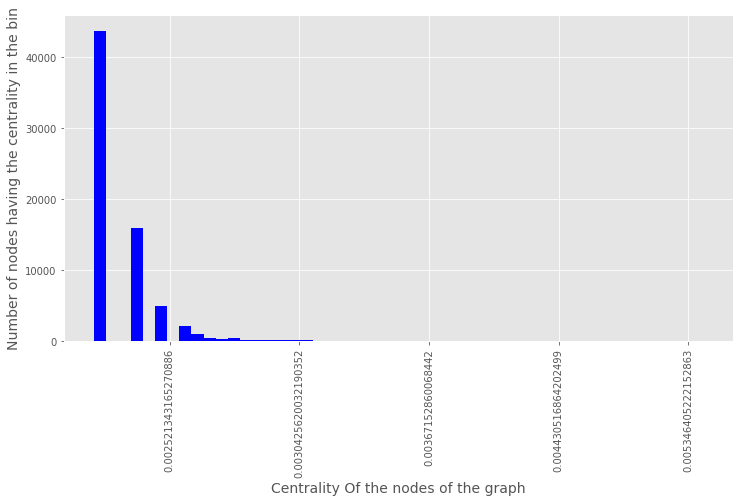

In [37]:
plt.figure(figsize=(12,6))
counts , bins , patches = plt.hist(np.log(centrality_array), bins=50, color ='b')
plt.axes().set_xticklabels(np.exp(bins)*np.exp(5), rotation = 90)
plt.axes().set_xlabel('Centrality Of the nodes of the graph', fontsize = '14')
plt.axes().set_ylabel('Number of nodes having the centrality in the bin', fontsize = '14')
plt.show()